In [1]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

In [60]:
log = pd.read_csv('Login.csv')

In [62]:
auth = tweepy.AppAuthHandler(log['key'][0], log['key'][1])

In [63]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [66]:
# Grab tweets
search_term = '#bitcoin -filter:retweets'

tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2018-09-01', tweet_mode='extended').items(2000)

all_tweets = [tweet.full_text for tweet in tweets]

In [68]:
df = pd.DataFrame(all_tweets, columns=['Tweets'])

In [70]:
# Clean tweets
def clean_tweets(tweet):
  twt = re.sub('#bitcoin', 'bitcoin', tweet)
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt)
  twt = re.sub('\\n', '', twt)
  twt = re.sub('https?:\/\/\S+', '', twt) # remove hyperlinks
  return twt

In [71]:
df['Tweets'] = df['Tweets'].apply(clean_tweets)
df.head()

,Tweets
0,"Nordigen raises €2.1 million to take on Tink, ..."
1,Someone took Elon's phone away this week. @elo...
2,What if we are in 2016 and haven't seen the re...
3,@MatthewDiemer bitcoin advocates.
4,@nayibbukele Green bitcoin


In [74]:
def get_subjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity
def get_polarity(tweet):
  return TextBlob(tweet).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

df.head()

,Tweets,Subjectivity,Polarity
0,"Nordigen raises €2.1 million to take on Tink, ...",0.0,0.0
1,Someone took Elon's phone away this week. @elo...,0.0,0.0
2,What if we are in 2016 and haven't seen the re...,0.3,0.2
3,@MatthewDiemer bitcoin advocates.,0.0,0.0
4,@nayibbukele Green bitcoin,0.3,-0.2


In [77]:
def get_sentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
  
df['Sentiment'] = df['Polarity'].apply(get_sentiment)

df.head()

,Tweets,Subjectivity,Polarity,Sentiment
0,"Nordigen raises €2.1 million to take on Tink, ...",0.0,0.0,Neutral
1,Someone took Elon's phone away this week. @elo...,0.0,0.0,Neutral
2,What if we are in 2016 and haven't seen the re...,0.3,0.2,Positive
3,@MatthewDiemer bitcoin advocates.,0.0,0.0,Neutral
4,@nayibbukele Green bitcoin,0.3,-0.2,Negative


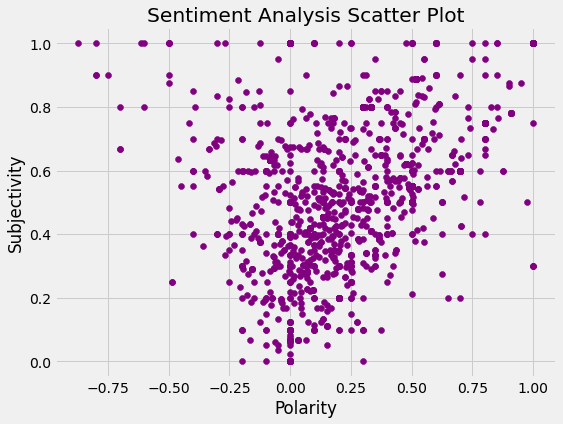

In [79]:
plt.figure(figsize=(8,6))

for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple')

plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


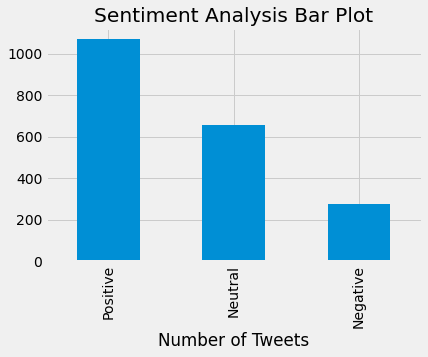

In [81]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.xlabel('Number of Tweets')
plt.show()